In [12]:
import pandas as pd
import requests

In [13]:
#Use Open Meteo API to get weather data for 2023-2024
base_url = 'https://archive-api.open-meteo.com/'
endpoint = 'v1/archive'
#Set parameters to retrieve Alta ski resort weather data from 12-01-23 to 03-31-24. Desired features are listed.
params23_24 = {
    'latitude': 40.5888,
    'longitude': -111.6380,
    'elevation': 8560,
    'start_date': '2023-12-01',
    'end_date': '2024-03-31',
    'temperature_unit': 'fahrenheit',
    'wind_speed_unit': 'mph',
    'precipitation_unit': 'inch',
    'daily': ['weather_code','temperature_2m_max','temperature_2m_min',
               'temperature_2m_mean','apparent_temperature_max','apparent_temperature_min',
               'apparent_temperature_mean','rain_sum','snowfall_sum','precipitation_hours',
               'wind_speed_10m_max','wind_gusts_10m_max','wind_direction_10m_dominant',
               'shortwave_radiation_sum','et0_fao_evapotranspiration'],
    'timezone': 'MST'
}
#request to API, convert to json, and create dataframe
response23_24 = requests.get(base_url + endpoint, params=params23_24)
data23_24 = response23_24.json()
OM_23_24 = data23_24['daily']
df23_24 = pd.DataFrame(OM_23_24)


In [14]:
#Use Open Meteo API to get weather data for 2024-2025
#Set parameters to retrieve Alta ski resort weather data from 12-01-24 to 03-31-25. Desired features are listed.

params24_25 = {
    'latitude': 40.5888,
    'longitude': -111.6380,
    'elevation': 8560,
    'start_date': '2024-12-01',
    'end_date': '2025-02-28',
    'temperature_unit': 'fahrenheit',
    'wind_speed_unit': 'mph',
    'precipitation_unit': 'inch',
    'daily': ['weather_code','temperature_2m_max','temperature_2m_min',
               'temperature_2m_mean','apparent_temperature_max','apparent_temperature_min',
               'apparent_temperature_mean','rain_sum','snowfall_sum','precipitation_hours',
               'wind_speed_10m_max','wind_gusts_10m_max','wind_direction_10m_dominant',
               'shortwave_radiation_sum','et0_fao_evapotranspiration'],
    'timezone': 'MST'
}
#request to API, convert to json, and create dataframe
response24_25 = requests.get(base_url + endpoint, params=params24_25)
data24_25 = response24_25.json()
OM_24_25 = data24_25['daily']
df24_25 = pd.DataFrame(OM_24_25)

In [15]:
#Combine the two dataframes into one for '23-'25
df23_25 = pd.concat([df23_24, df24_25], ignore_index=True)

In [16]:
#Create a new feature which is the target prediction feature for snowfall 3 days out
df23_25['3day_prediction'] = df23_25['snowfall_sum'].shift(-3)
df23_25[df23_25['snowfall_sum'] != 0.0]

,time,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,3day_prediction
0,2023-12-01,73,-50.3,-60.1,-54.6,-60.4,-70.0,-64.5,0.000,1.406,18.0,9.2,31.1,253,5.09,0.001,0.276
1,2023-12-02,73,-46.5,-57.1,-52.2,-59.5,-68.3,-63.9,0.004,2.067,24.0,14.1,46.1,255,5.02,0.001,0.000
2,2023-12-03,75,-39.8,-46.6,-43.3,-50.9,-59.6,-54.9,0.004,7.110,24.0,14.0,44.1,266,2.62,0.001,0.000
3,2023-12-04,73,-34.2,-46.7,-40.1,-44.6,-56.0,-50.1,0.012,0.276,5.0,8.3,26.4,285,8.25,0.003,1.654
6,2023-12-07,75,-31.9,-56.1,-45.6,-46.0,-66.2,-57.0,0.000,1.654,9.0,15.3,51.9,249,8.03,0.002,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2025-02-19,73,-39.9,-55.9,-48.5,-49.3,-65.5,-57.9,0.000,0.193,3.0,5.4,17.9,251,10.94,0.003,0.000
203,2025-02-20,73,-42.4,-51.1,-47.6,-52.7,-60.3,-57.4,0.004,2.728,24.0,6.7,22.6,272,4.98,0.001,0.028
206,2025-02-23,71,-28.7,-46.6,-36.6,-38.8,-56.1,-46.8,0.000,0.028,1.0,8.2,25.7,251,9.80,0.006,0.000
207,2025-02-24,71,-26.1,-36.5,-31.7,-34.9,-47.8,-42.3,0.000,0.083,2.0,9.6,29.8,258,16.94,0.010,0.000


In [17]:
df23_25[['snowfall_sum', '3day_prediction']].tail(15)

,snowfall_sum,3day_prediction
197,5.677,1.764
198,3.335,0.193
199,1.543,0.193
200,1.764,2.728
201,0.193,0.000
202,0.193,0.000
203,2.728,0.028
204,0.000,0.083
205,0.000,0.469
206,0.028,0.000


In [18]:
SnowFall23_25 = df23_25.iloc[:-3,:] # remove last 3 rows with NaN values
SnowFall23_25.to_csv('SnowFall23_25.csv', index=False) #save to csv

In [21]:
SnowFall23_25.shape

(209, 18)

/var/folders/qd/drcknfc535n97zwys368kpw80000gn/T/ipykernel_65256/2120945820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SnowFall23_25['time'] = pd.to_datetime(SnowFall23_25['time'])
/var/folders/qd/drcknfc535n97zwys368kpw80000gn/T/ipykernel_65256/2120945820.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SnowFall23_25['month_year'] = SnowFall23_25['time'].dt.to_period('M')


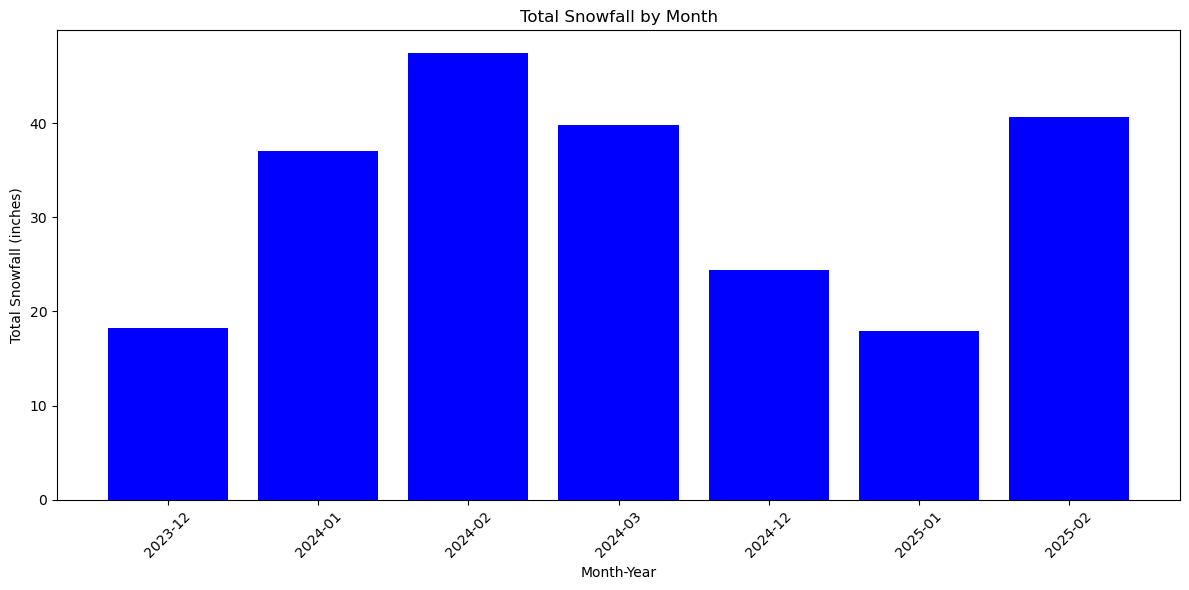

In [24]:
import matplotlib.pyplot as plt
# Convert the 'time' column to datetime format
SnowFall23_25['time'] = pd.to_datetime(SnowFall23_25['time'])

# Extract the month and year from the 'time' column
SnowFall23_25['month_year'] = SnowFall23_25['time'].dt.to_period('M')

# Group by month and year, then sum the snowfall
monthly_snowfall = SnowFall23_25.groupby('month_year')['snowfall_sum'].sum()

# Plot the total snowfall by month using plt.plot
plt.figure(figsize=(12, 6))
plt.bar(monthly_snowfall.index.astype(str), monthly_snowfall.values, color='blue')
plt.title('Total Snowfall by Month')
plt.xlabel('Month-Year')
plt.ylabel('Total Snowfall (inches)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('total_snowfall_by_month.png')

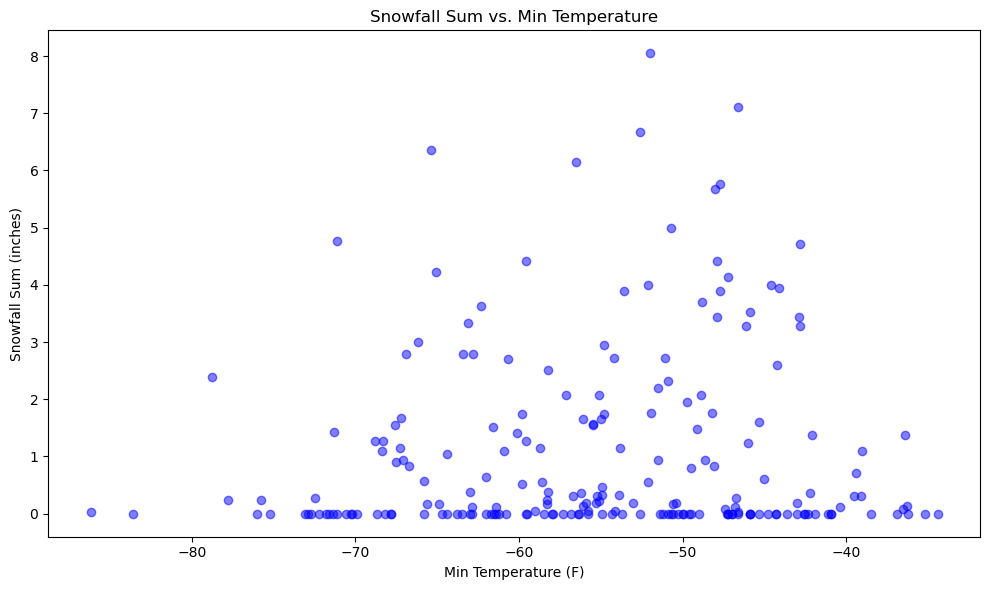

In [25]:
# Plot snowfall sum against min temperature
plt.figure(figsize=(10, 6))
plt.scatter(SnowFall23_25['temperature_2m_min'], SnowFall23_25['snowfall_sum'], color='blue', alpha=0.5)
plt.title('Snowfall Sum vs. Min Temperature')
plt.xlabel('Min Temperature (F)')
plt.ylabel('Snowfall Sum (inches)')
plt.tight_layout()
plt.savefig('snowfall_vs_min_temperature.png')